In [2]:
import glob
import ipyplot
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from IPython.display import display, Image
import shutil

## Visualize # GT Images / Cultural Artifact by Category 

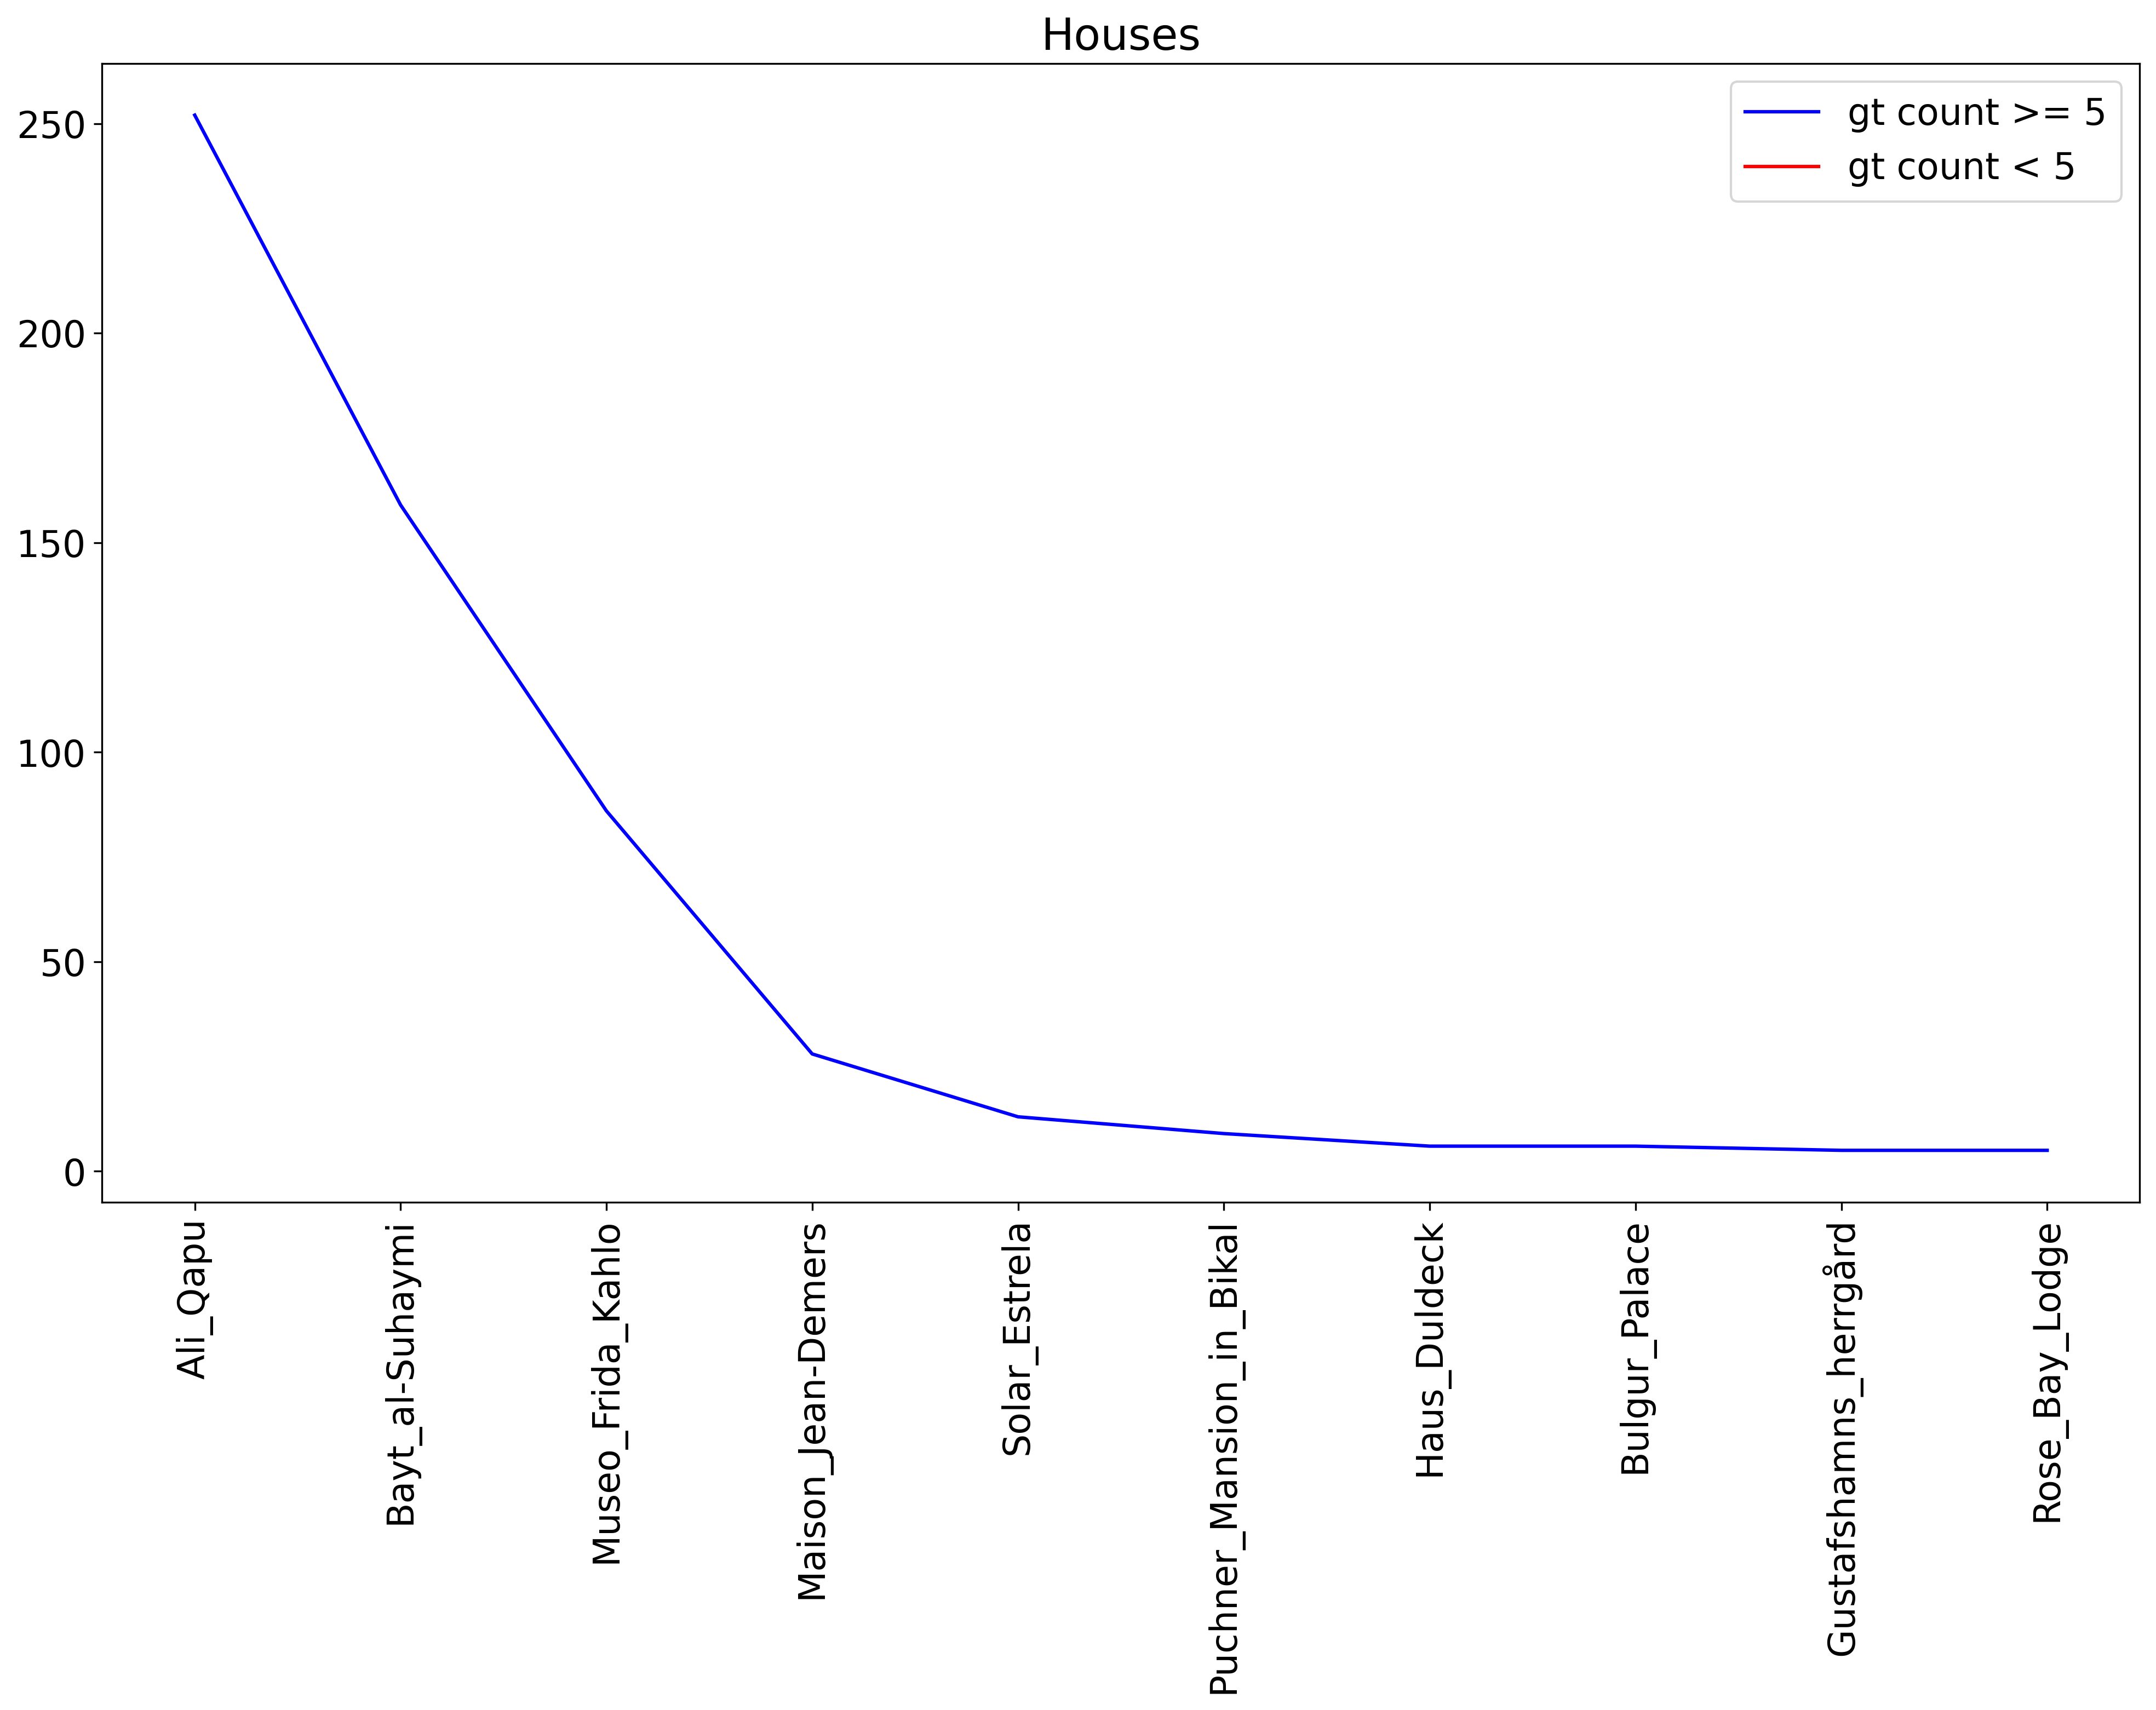

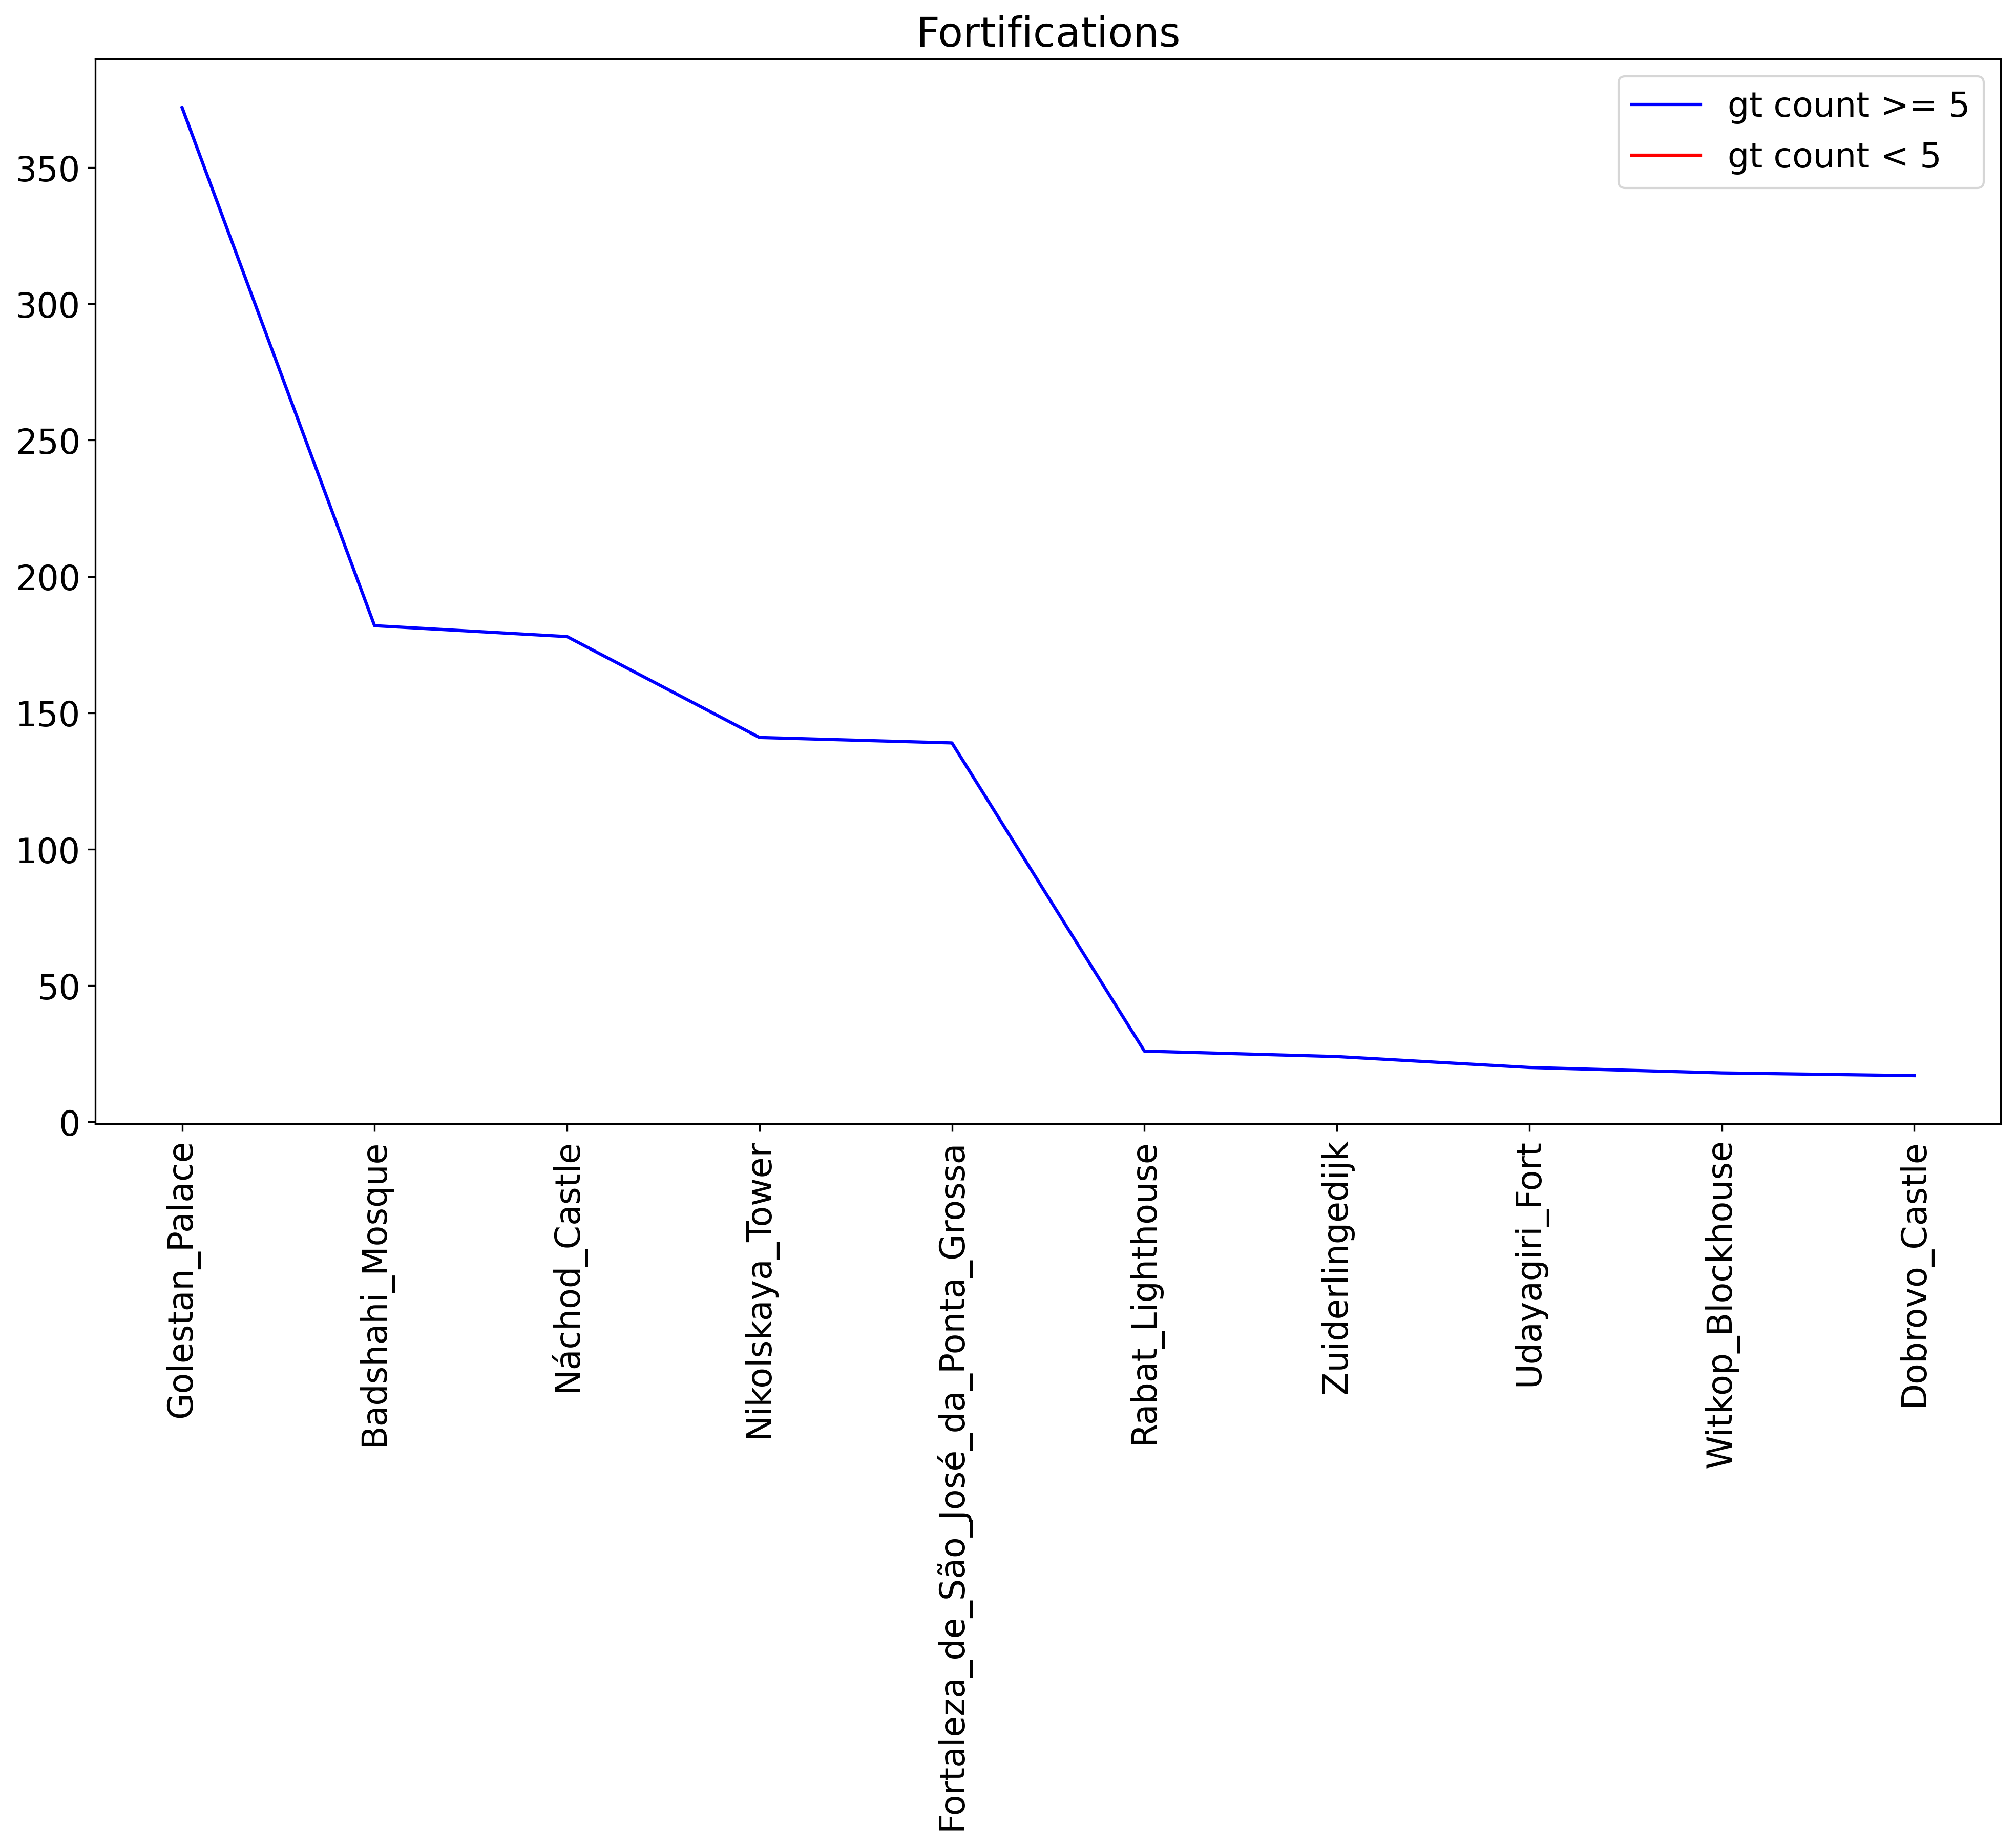

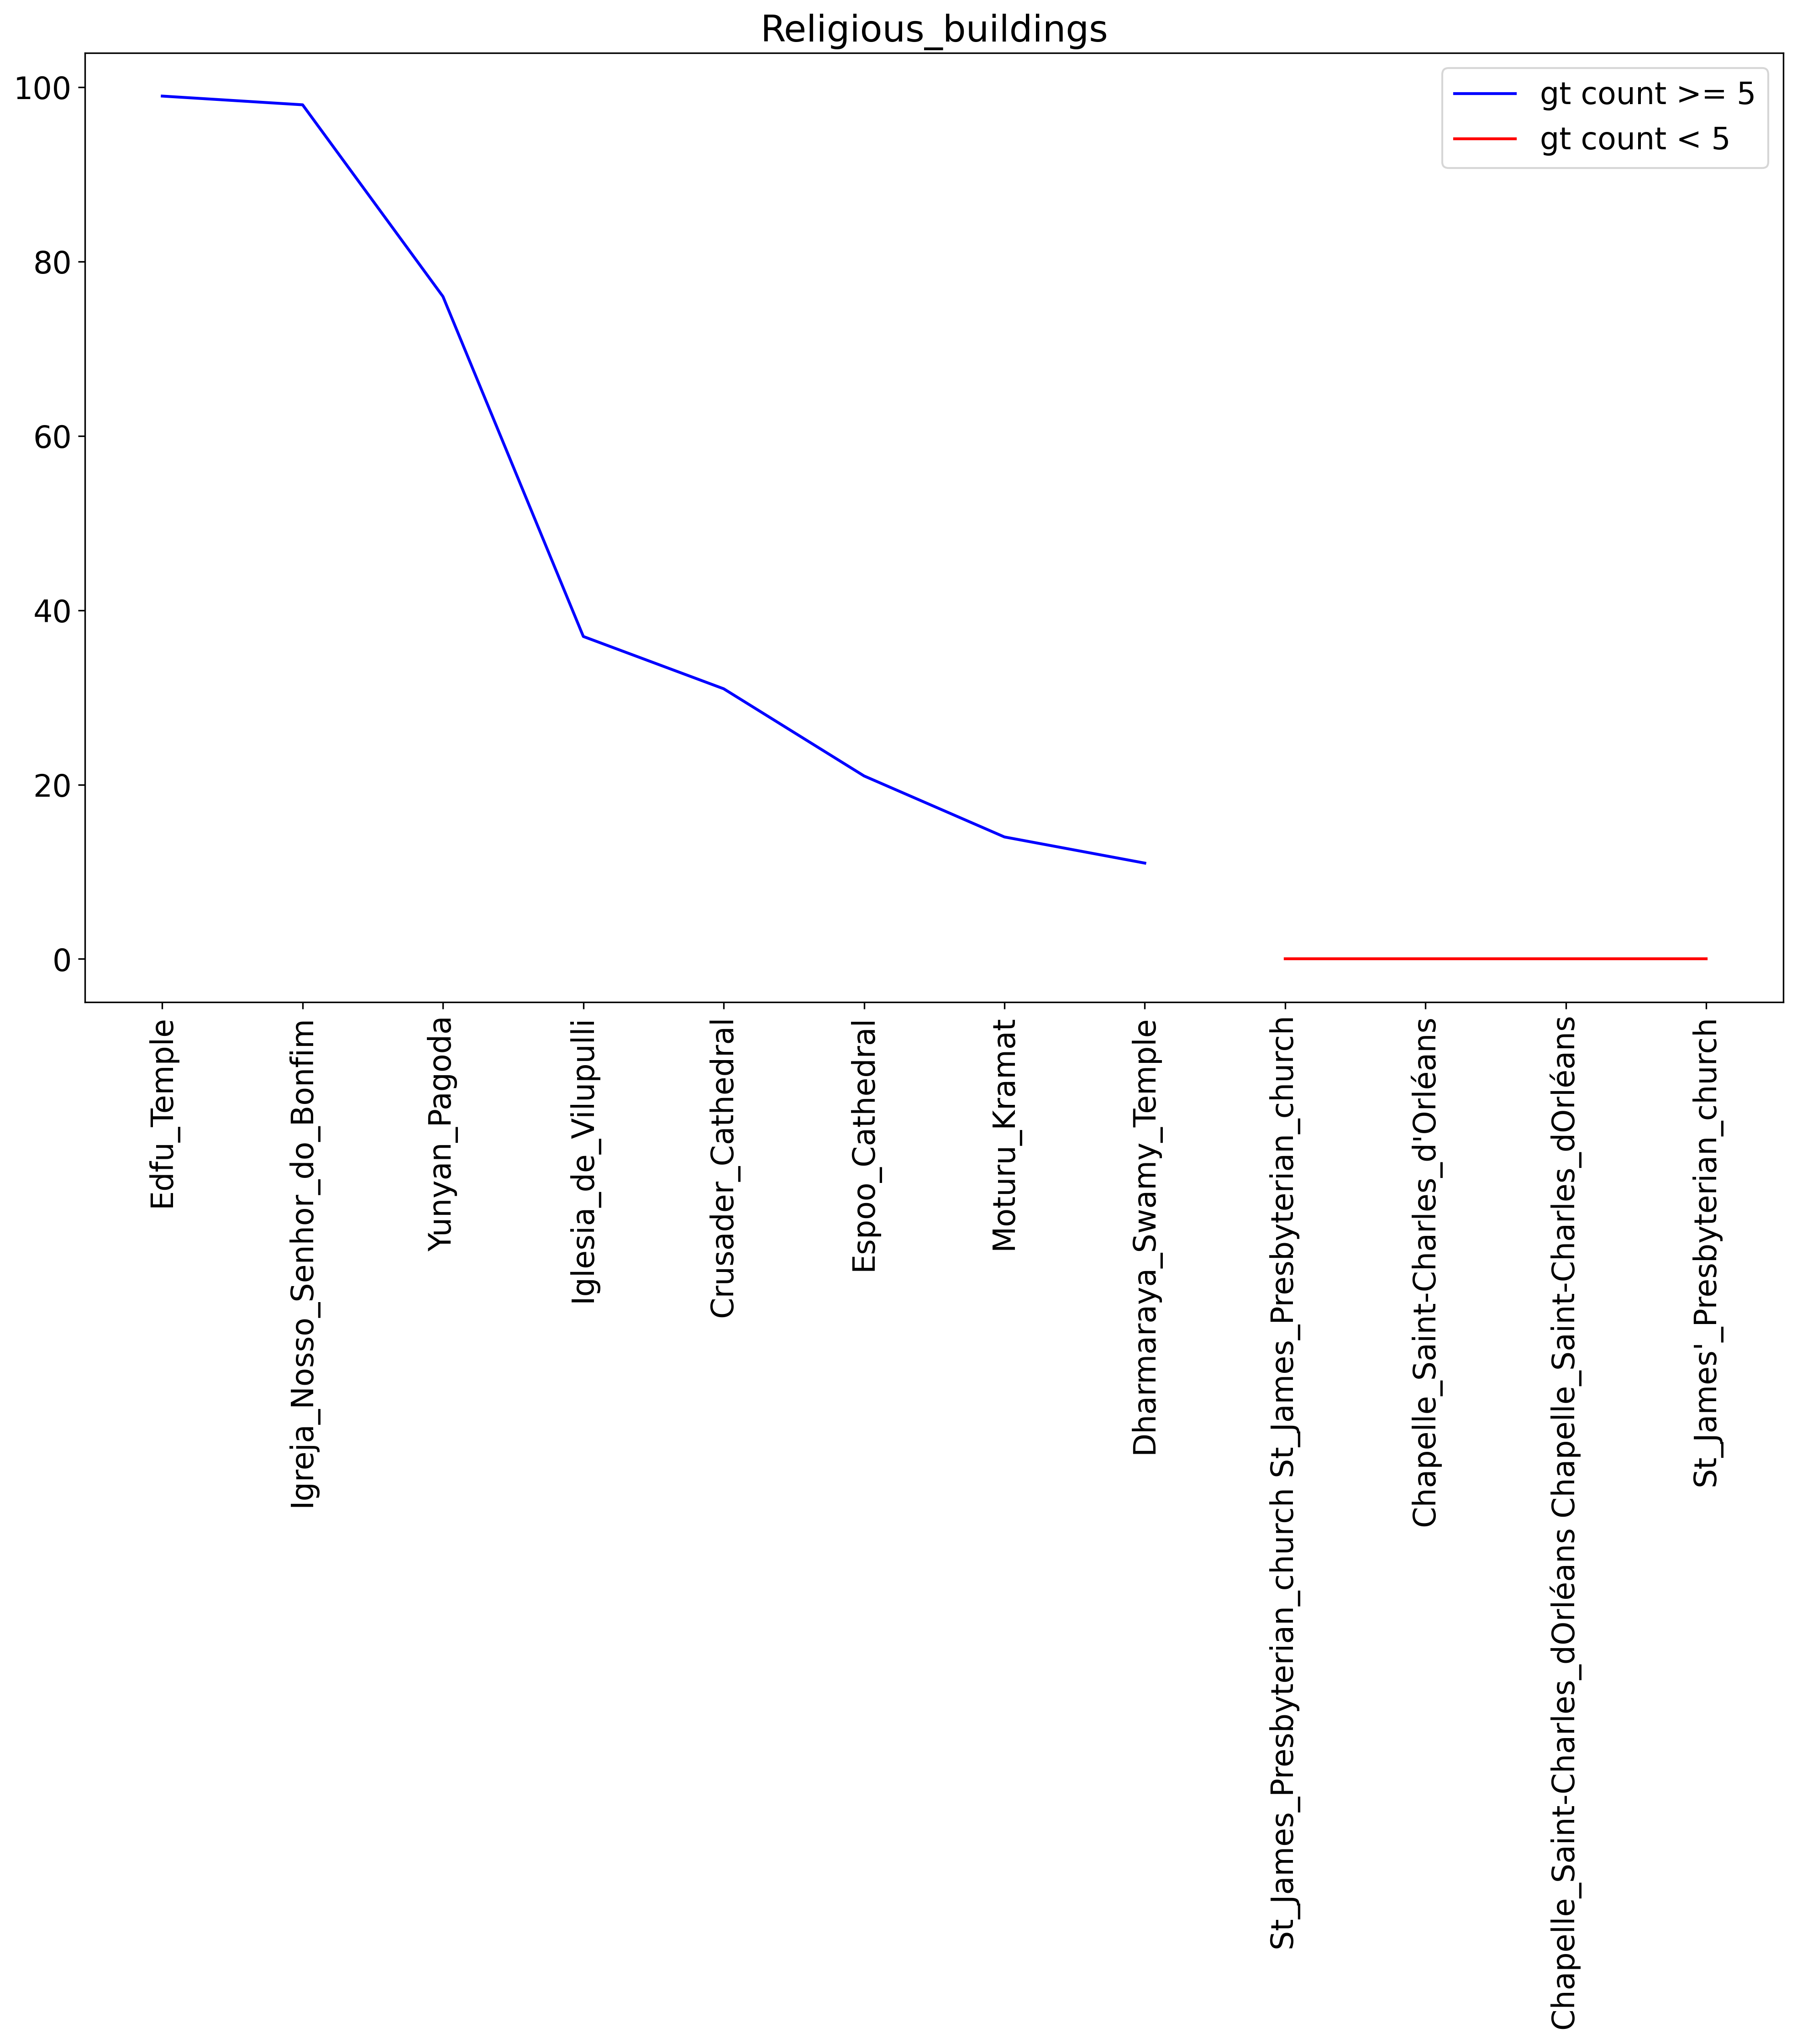

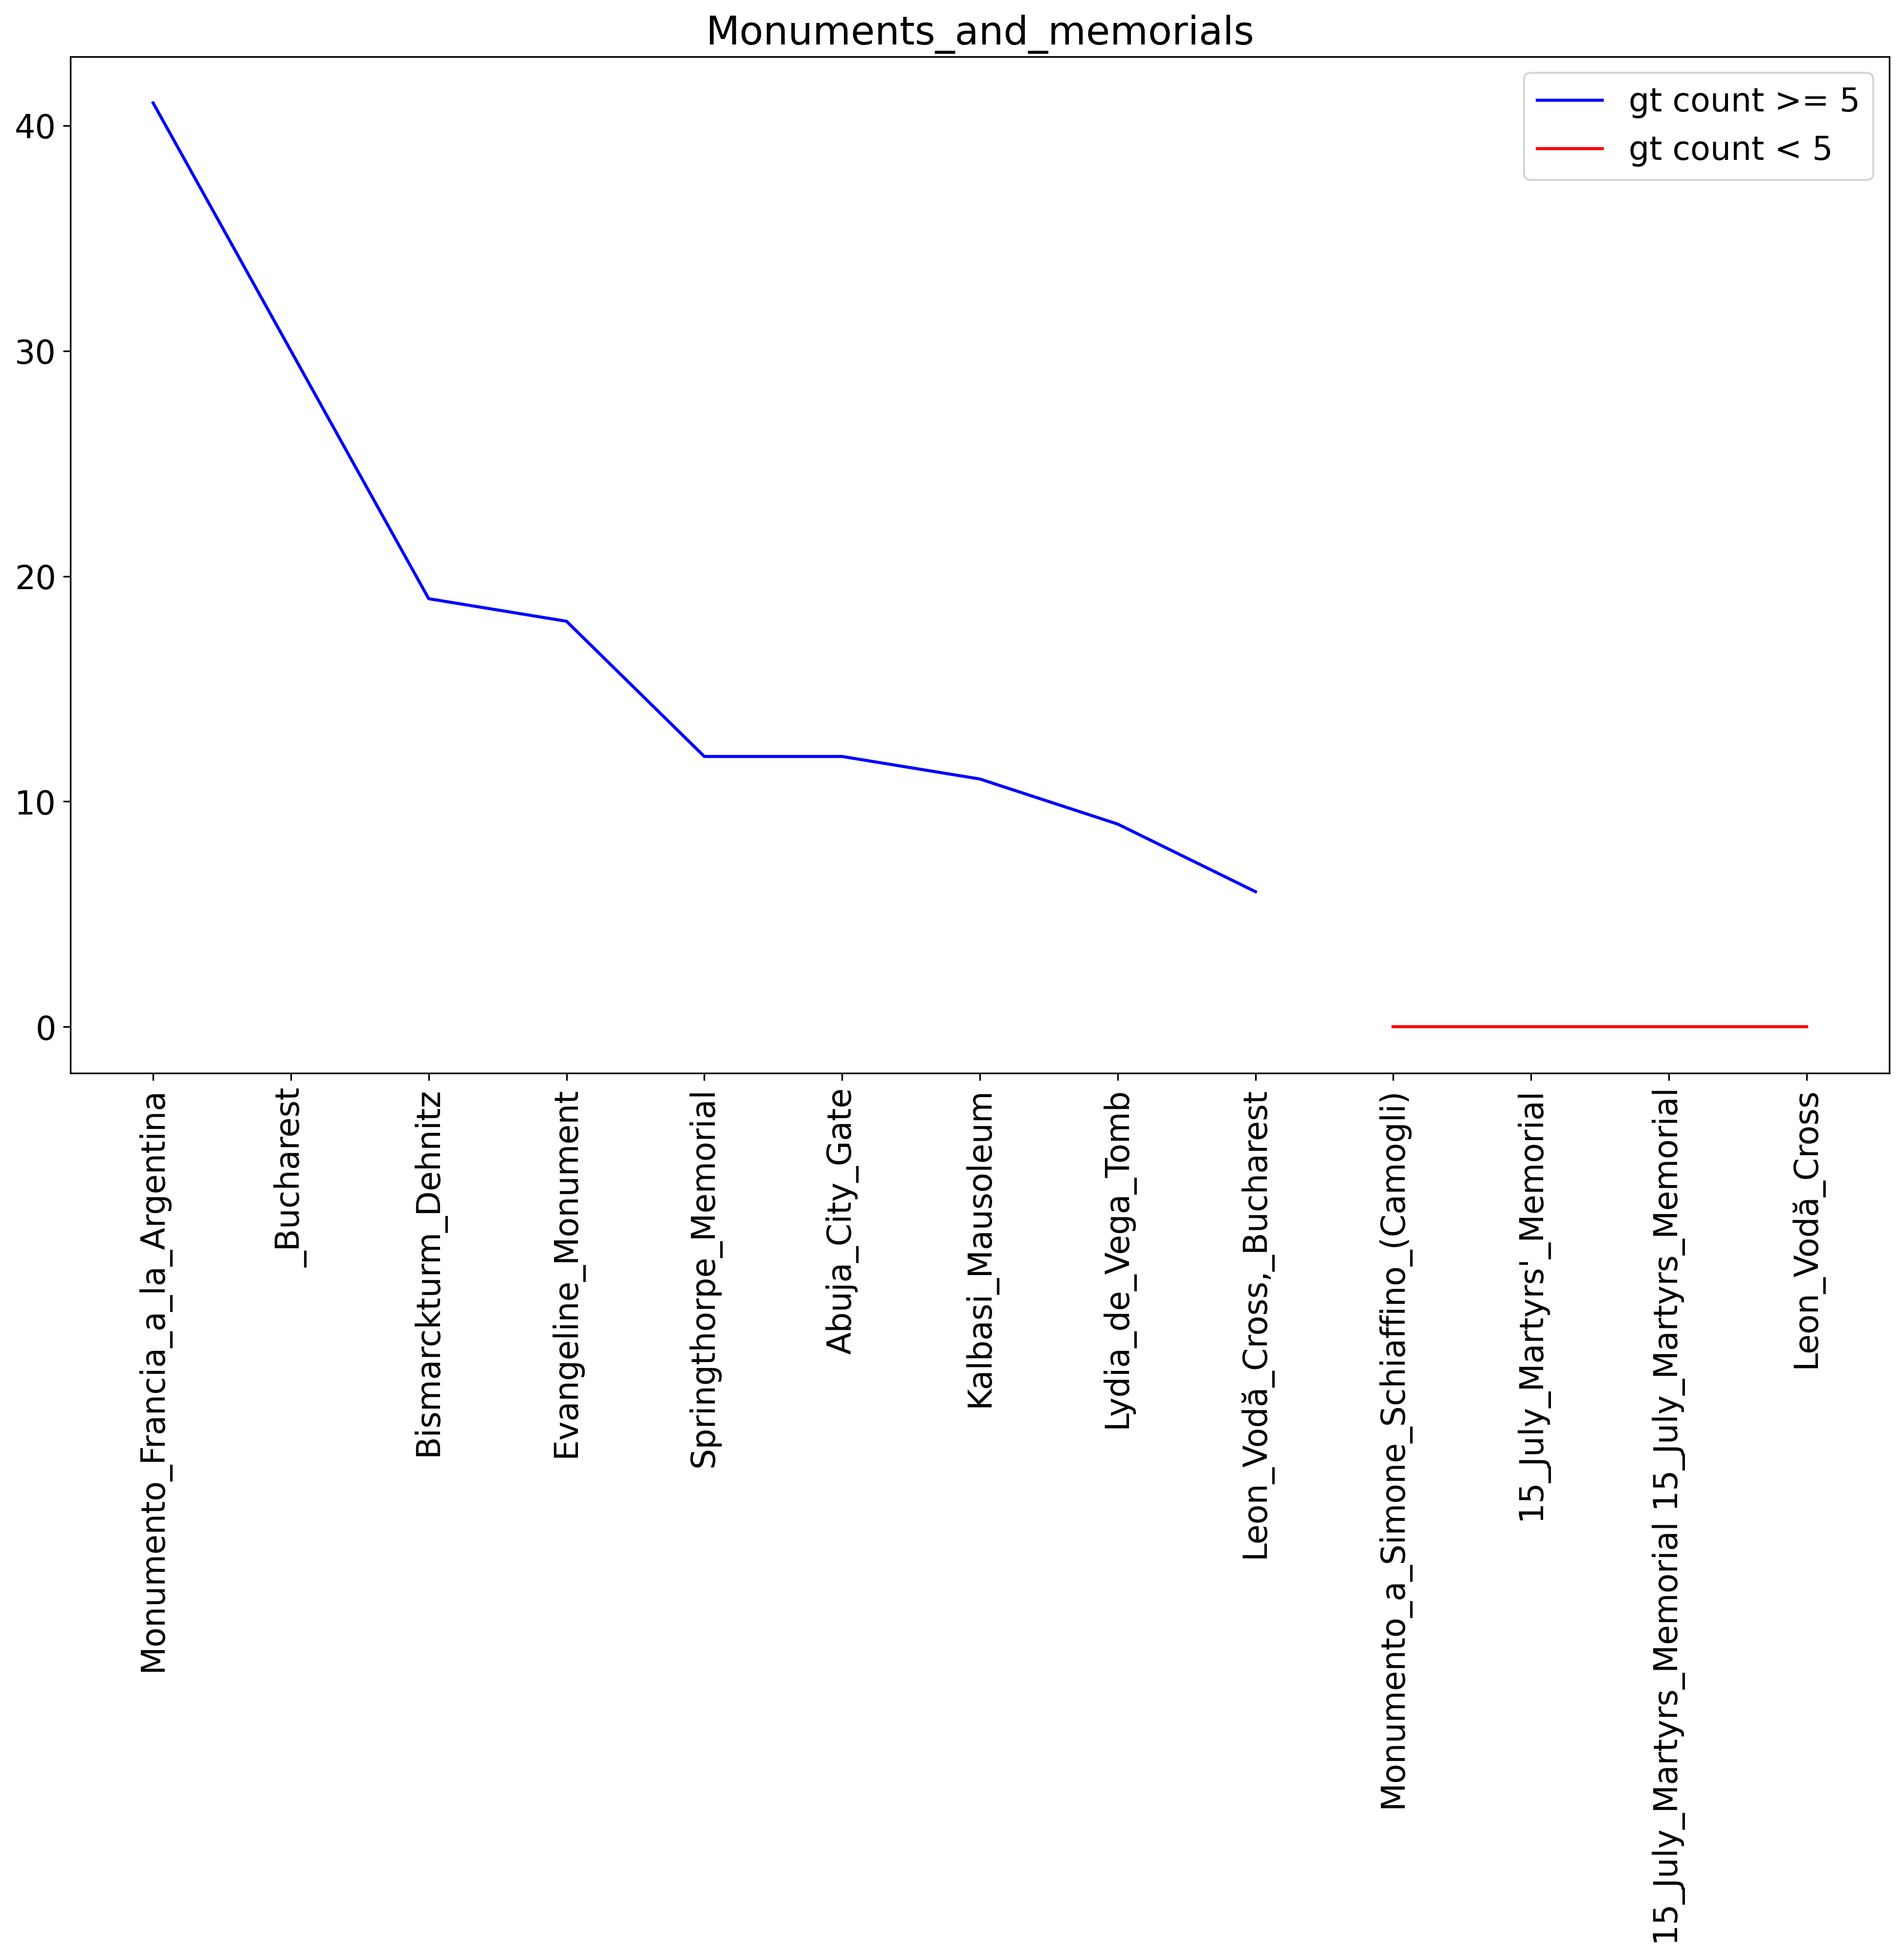

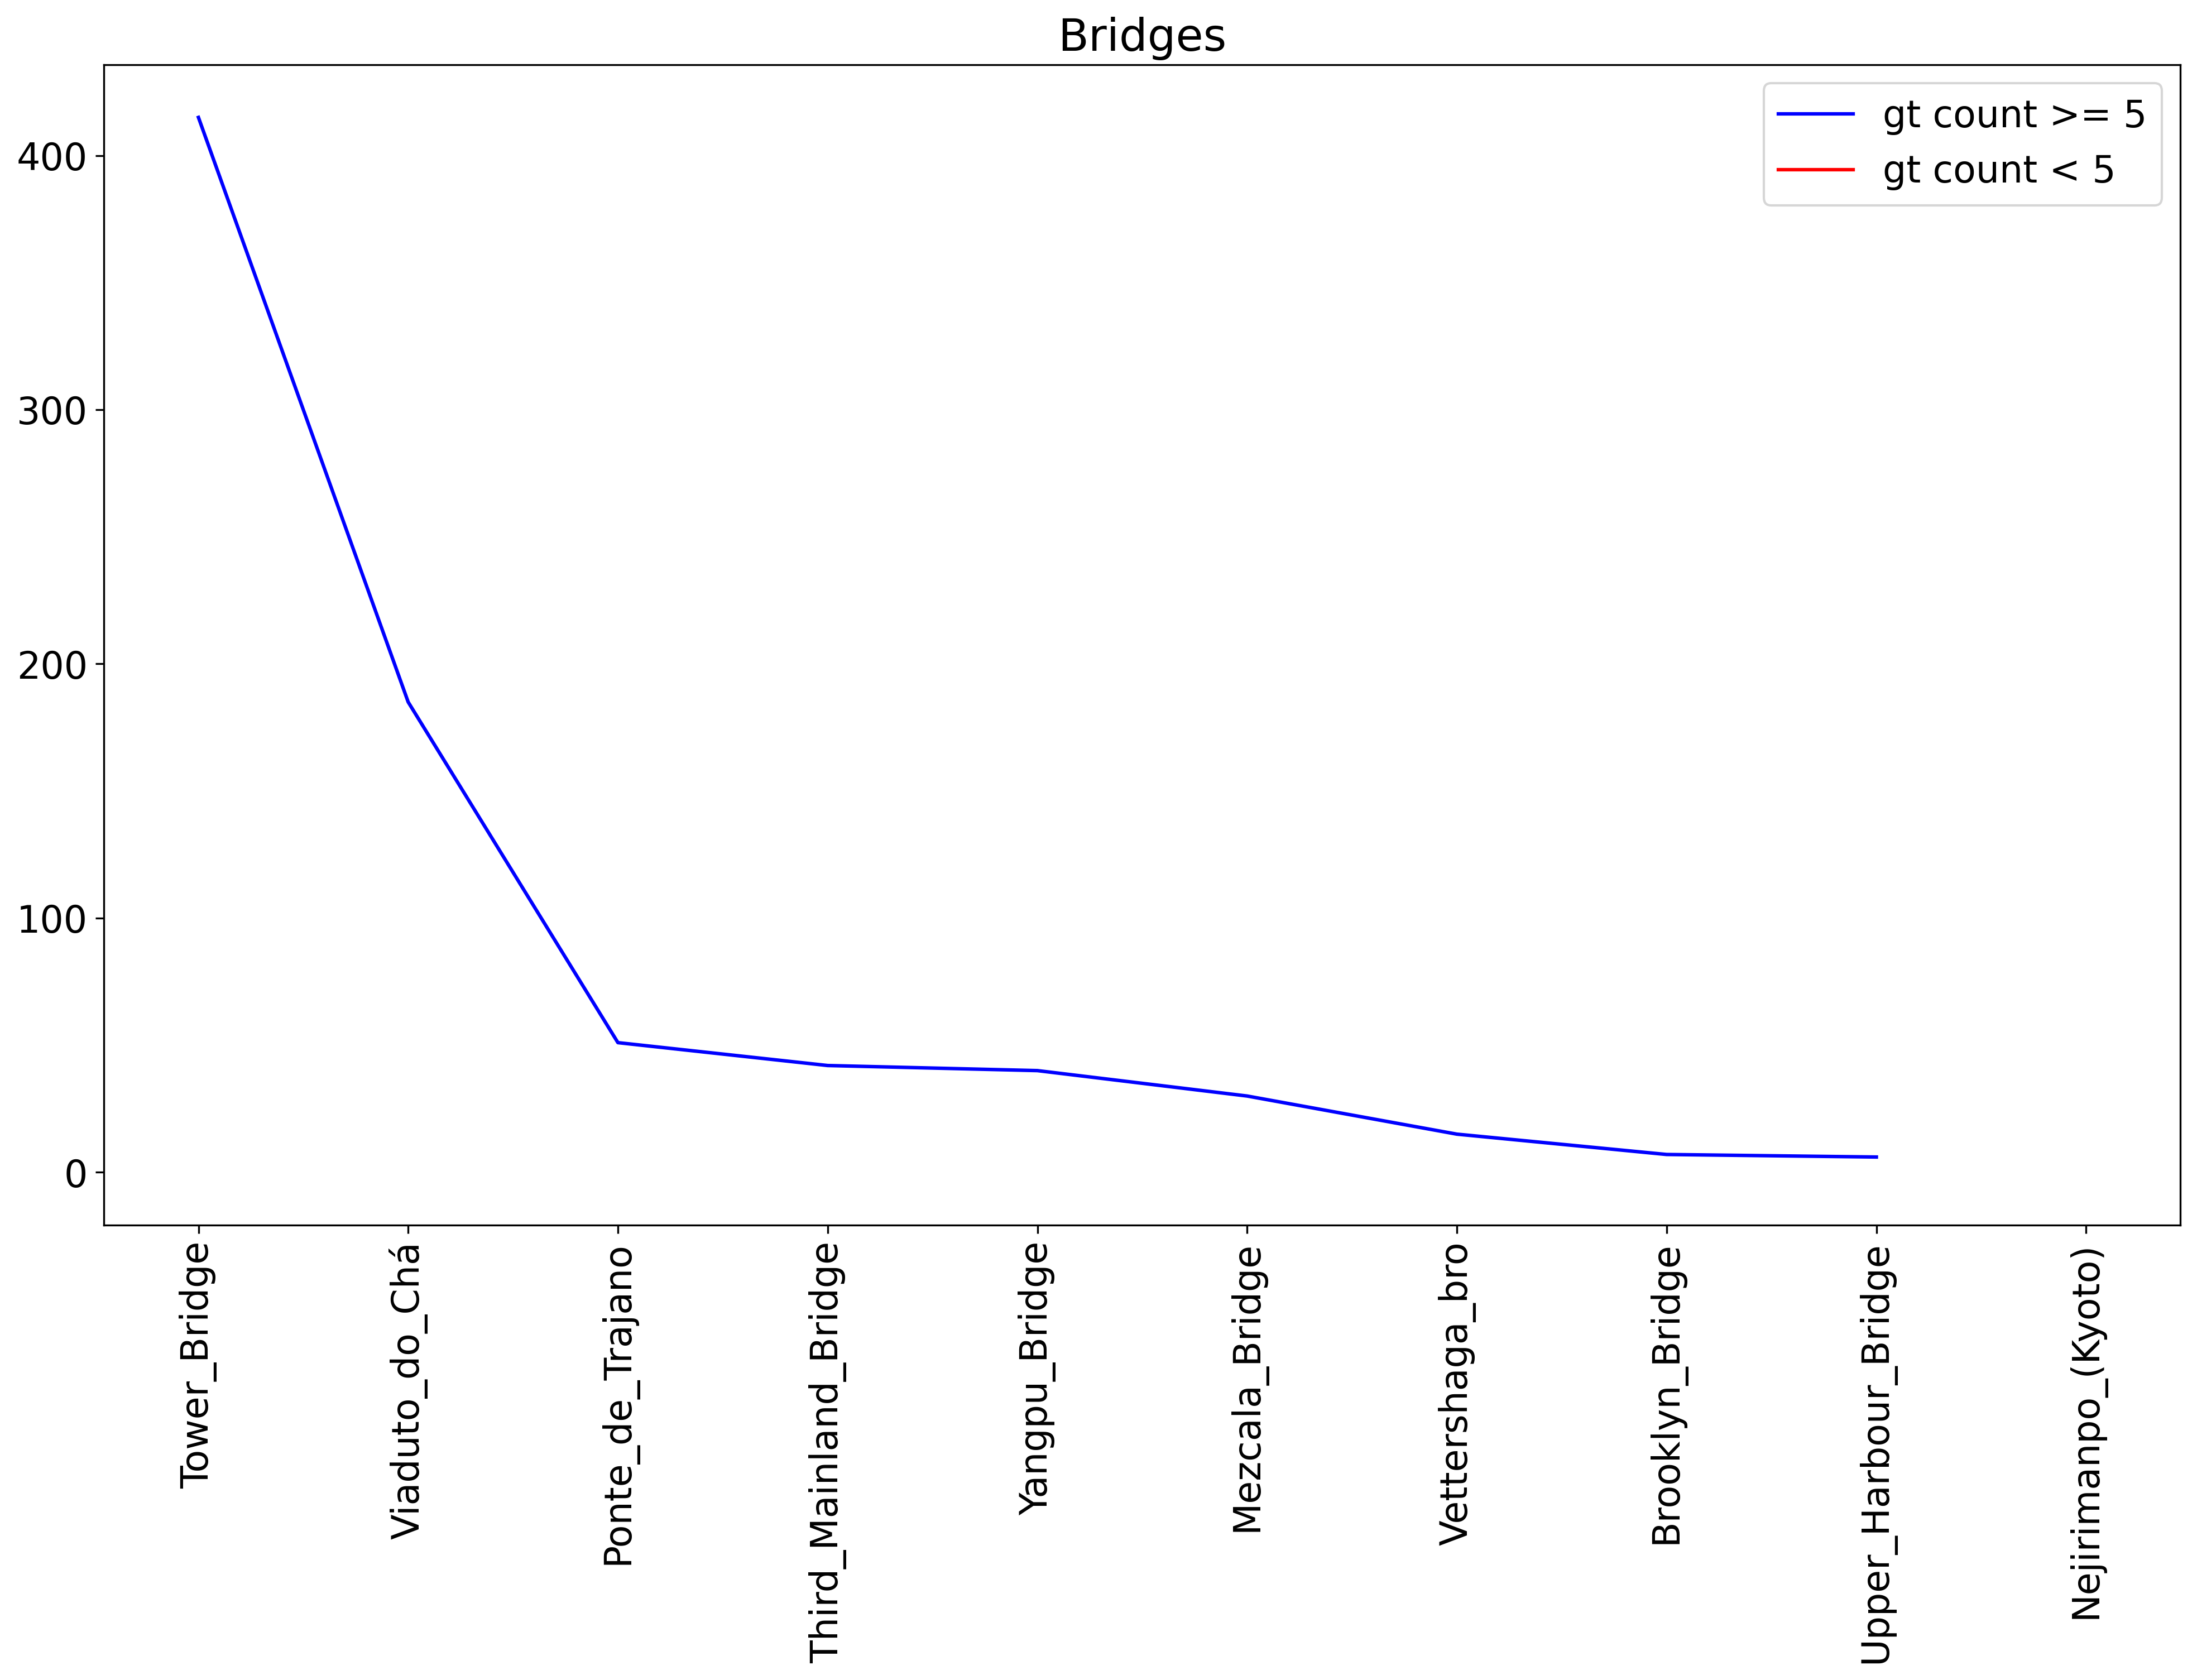

In [36]:
categories = ['architecture', 'art', 'celebrations', 'fashion', 'food', 'people']
cat = categories[0]
gt_odir = f"gt_images/{cat}" # directory containing downloaded Wikimedia images
subcats = os.listdir(gt_odir)

gt_tail_threshold = 5 # threshold for number of images on Wikimedia

for sc in subcats:
    item_gt_count = {}
    for item in [f for f in os.listdir(f'{gt_odir}/{sc}') if not f.startswith('.')]:
        item_path = f'{gt_odir}/{sc}/{item}'
        item_gt_count[item] = len(os.listdir(item_path))
    
    indices = np.argsort(np.array(list(item_gt_count.values())))[::-1] 
    items = np.array(list(item_gt_count.keys()))[indices]
    counts = np.array(list(item_gt_count.values()))[indices]
    
    high_gt = np.where(counts > gt_tail_threshold)
    low_gt = np.where(counts <= gt_tail_threshold)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.title(f"{sc}")
    plt.rcParams.update({'font.size': 16})
    plt.plot(items[high_gt], counts[high_gt], c='b', label='gt count >= 5')
    plt.plot(items[low_gt], counts[low_gt], c='r', label='gt count < 5')
    plt.legend()
    plt.xticks(rotation=90)
    plt.savefig(f"gt_count_figs/{cat}_{sc}_gt_count.png", bbox_inches='tight')

## Select Regional Variants for Ground Truth subset with [ipyplot](https://github.com/karolzak/ipyplot)

In [4]:
generated_items_root = '../gt_images/' # directory where downloaded Wikimedia images are saved
selected_gt_odir = 'selected_gt/' # pass in 
selected_gt_json = 'prepare_data/selected_gt_idx.json'

if os.path.exists(selected_gt_json):
    f = open(selected_gt_json,)
    selected_idx_dict = json.load(f)
else:
    selected_idx_dict = {}

In [9]:
categories = [item.split("/")[-1] for item in glob.glob(f'{generated_items_root}*')]
print(categories)

['celebrations', 'fashion', 'people', 'art', 'architecture', 'food']


In [15]:
image_path_dict = {}
get_items_from_path = lambda path: [item.split("/")[-1] for item in glob.glob(f'{path}/*')]

# You can use indices to traverse all (cat, subcat, item) tuples below:
cat = categories[0] # celebrations
subcats = get_items_from_path(f'{generated_items_root}/{cat}')

subcat = subcats[2] # 'Christmas_food'
local_items = get_items_from_path(f'{generated_items_root}/{cat}/{subcat}')

local_item = local_items[8] # 'Vanillekipferl' , taken from wikimedia_category in csv

items_paths = glob.glob(f"{generated_items_root}{cat}/{subcat}/*")
for item_path in items_paths:
    item_name = item_path.split("/")[-1]
    image_paths = glob.glob(f'{item_path}/*')
    image_path_dict[item_name] = image_paths

['Havregrynskugler', 'Gingerbread_houses_in_the_United_States', 'Hojuelas', 'Bolo_rei', 'Bredele', 'Pineapple_tart', 'Puto_bumbong', 'White_Christmas_(food)', 'Vanillekipferl', 'Panettone', 'Chokladbollar']


In [ ]:
images_paths = image_path_dict[local_item]
images_paths.sort()
ipyplot.plot_images(images_paths, max_images=100, img_width=150)

In [ ]:
selected_idx = [3, 33 , 36, 12] # modify this based on above ipyplot and verify selected images are the ones you want

selected_imgs = [images_paths[idx] for idx in selected_idx]
selected_idx_dict[local_item] = selected_imgs
selected_img_filenames = [f'{selected_gt_odir}{local_item}-gt{i+1}.jpg' for i in range(4)]
print(selected_imgs)
print(selected_img_filenames)
[shutil.copy(selected_imgs[i], selected_img_filenames[i]) for i in range(len(selected_imgs))]

# viusalize selected images
[display(Image(images_paths[idx])) for idx in selected_idx]

# save selected images to json
with open('selected_gt_idx.json', 'w') as f:
    json.dump(selected_idx_dict, f)

ipyplot.plot_images(selected_img_filenames)